<img src="img/uomlogo.png" align="left"/><br><br>
# PHYS20762 - Jupyter Notebook Tips and Tricks

(c) Hywel Owen  
University of Manchester  
5th May 2020

In this notebook, I show the some useful tips and tricks when using Jupyter.

## Keyboard Shortcuts and Command-Line Tricks

Try pressing the **Escape** key to access the keyboard shortcuts. If you press **H** then you will access the list of *Keyboard Shortcuts* which you can also find under the **Help** menu at the top of this notebook.

This will show the list below:
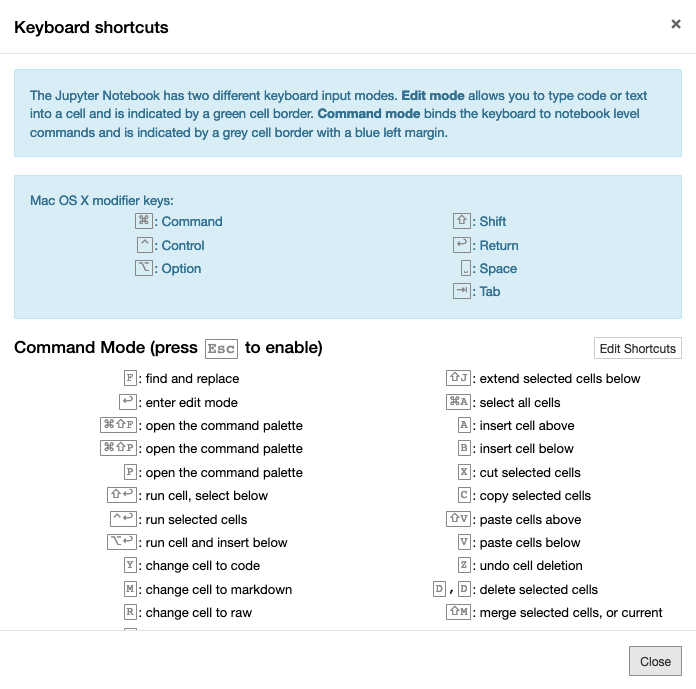

Another *really* useful shortcut is **Cmd + Shift + F** (or **Ctrl + Shift + F** on Windows). This brings up a keyboard dialog box where you can enter commands using your keyboard instead of using a mouse (using the mouse is generally slower).

Another useful thing you can do is use **?(command name)** to get help about that command. The help documentation appears in a separate window below the main notebook:

In [13]:
import numpy as np
?np.random

## Magic Commands

Jupyter provides us with so-called *magic* commands that operate within the Jupyter notebook but which are not really part of the Python language. We can see the available magic commands by using (of course!) a magic command:

In [14]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%

In fact, in other notebooks we already used the magic command **%matplotlib inline** to get inline plots in our notebooks.

Magic comments are either *cell magic* (operate on the whole contents of a cell) or *line magic* (operate only on one line of code).

To start, let's use the cell magic **%%writefile** to write a Python file from the contents of a cell. This one makes the plot of a sine function:

In [18]:
%%writefile sineplot.py
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0,8*np.pi,8*np.pi/100)
y = np.sin(x)
plt.plot(x,y)
plt.show()

Writing sineplot.py


Rather than making the plot and showing it, the **%%writefile** command has written the cell contents to a file.

We can list the contents of the file we just generated using **%pycat**. The answer will be shown in a separate window below the main notebook contents.

In [25]:
%pycat sineplot.py

A fun magic command is **%run**, which lets you other Python files from within this Jupyter notebook. Let's try it on the Python script file we just generated:

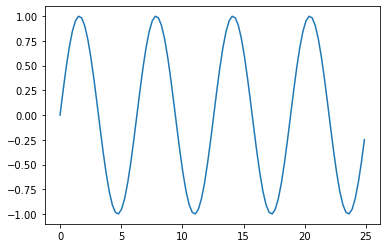

In [19]:
%run ./sineplot.py

Another thing we can do is to read the contents of a file and load them into a cell. Try running the command below - it shoud replace the command with the contents of the file, which you can then run.

In [ ]:
%load ./sineplot.py

**%who** tells you about what variables have been defined (in the global scope of the notebook)

In [24]:
%who

InteractiveShell	 L	 i	 j	 monte_carlo_pi	 np	 plt	 random	 total	 
x	 y	 


There are a number of timing cell magics and line magics that we can use to time code. To start, we can use **%%timeit** to repeatedly run a cell's contents and find an average execution time:

In [2]:
%%timeit
total = 0
for i in range(1000):
    for j in range(1000):
        total += i * j

92 ms ± 2.78 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


If we have a single line of code that takes a long-ish time to execute, then we can use the **%time** command to do a single time measurement

In [3]:
import random
L = [random.random() for i in range(1000000)]
%time L.sort()

CPU times: user 293 ms, sys: 10.3 ms, total: 303 ms
Wall time: 312 ms


Similarly, if we have a cell that we want to time once, then we can use **%%time**:

In [4]:
%%time
total = 0
for i in range(5000):
    for j in range(5000):
        total += i * j

CPU times: user 4.65 s, sys: 45.3 ms, total: 4.69 s
Wall time: 6.14 s


We can get more detail about how a code (with sub-functions) runs by using the code profiler **%prun**. Let's try it on the standard **Numba** example that calculates $\pi$:

In [26]:
def monte_carlo_pi(nsamples):
    acc = 0
    for i in range(nsamples):
        x = np.random.random()
        y = np.random.random()
        if (x ** 2 + y ** 2) < 1.0:
            acc += 1
    return 4.0 * acc / nsamples

%prun monte_carlo_pi(100000)

## Executing Shell Commands

We can execute *shell* commands (i.e. commands you enter in a terminal window (DOS prompt on Windows, or Terminal on Mac). For example, on a Mac you can list files in a folder:

In [27]:
!ls

phys20762anscombesquartet.ipynb       phys20762montecarlo.ipynb
phys20762beginningpython.ipynb        phys20762numericalexamples.ipynb
phys20762cointoss.ipynb               phys20762randomsampling.ipynb
phys20762demystifyingchisquared.ipynb phys20762timingyourcode.ipynb
phys20762eulersmethod.ipynb           phys20762turtle.ipynb
phys20762fitting.ipynb                phys20762variancereduction.ipynb
phys20762flowcontrolinpython.ipynb    phys20762variances.ipynb
phys20762magiccommands.ipynb          sineplot.py


We can run command-line scripts direct from a Jupyter cell:

In [29]:
%%bash
for i in {1..10}
do echo "i is $i"
done

i is 1
i is 2
i is 3
i is 4
i is 5
i is 6
i is 7
i is 8
i is 9
i is 10


You can use the **%%python3** cell magic to run a cell in a different *instance* of Python (i.e. run the code in a completey different environment to the main Jupyter notebook):

In [38]:
%%python3
a = 7
b = 5
print(a+b)

12


You can see that it's different because the variable **a** was used in the previous cell, but remainds undefined in the notebook.

In [37]:
a

NameError: name 'a' is not defined